In [1]:
import pandas as pd 


In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
# Null value is Present in Cuisines column
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
df=df.fillna('Cuisines')#filling null values in cuisines columns

In [7]:
df.isnull().sum()#no null value is left know

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

Build a regression model to predict the
aggregate rating of a restaurant based on
available features.
Split the dataset into training and testing sets
and evaluate the model's performance using
appropriate metrics.

Experiment with different algorithms (e.g.,
linear regression, decision trees, random
forest) and compare their performance.

In [8]:
data=df[['Longitude','Latitude','Has Table booking','Has Online delivery','Price range','Votes','Aggregate rating']]#creating a new dataframe because our real dataframe have so many unwanted columnd which are not good for prediction


In [9]:
data.to_csv('model.csv')

creating model for prediction

In [10]:
df=pd.read_csv('model.csv')

In [11]:
df.head()

,Unnamed: 0,Longitude,Latitude,Has Table booking,Has Online delivery,Price range,Votes,Aggregate rating
0,0,121.027535,14.565443,Yes,No,3,314,4.8
1,1,121.014101,14.553708,Yes,No,3,591,4.5
2,2,121.056831,14.581404,Yes,No,4,270,4.4
3,3,121.056475,14.585318,No,No,4,365,4.9
4,4,121.057508,14.584450,Yes,No,4,229,4.8


In [12]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()

In [13]:
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [14]:
#creating dependent and independent columns

In [15]:
X=df.drop(labels=['Aggregate rating'],axis=1)
y=df['Aggregate rating']

In [16]:
X

,Longitude,Latitude,Has Table booking,Has Online delivery,Price range,Votes
0,121.027535,14.565443,Yes,No,3,314
1,121.014101,14.553708,Yes,No,3,591
2,121.056831,14.581404,Yes,No,4,270
3,121.056475,14.585318,No,No,4,365
4,121.057508,14.584450,Yes,No,4,229
...,...,...,...,...,...,...
9546,28.977392,41.022793,No,No,3,788
9547,29.041297,41.009847,No,No,3,1034
9548,29.034640,41.055817,No,No,4,661
9549,29.036019,41.057979,No,No,4,901


In [17]:
y

0       4.8
1       4.5
2       4.4
3       4.9
4       4.8
       ... 
9546    4.1
9547    4.2
9548    3.7
9549    4.0
9550    4.0
Name: Aggregate rating, Length: 9551, dtype: float64

In [18]:
#segrigating numerical and categorical columns

In [19]:
categorical_columns=df.columns[df.dtypes=='O']
numerical_columns=df.columns[df.dtypes!='O']

In [20]:
categorical_columns

Index(['Has Table booking', 'Has Online delivery'], dtype='object')

In [21]:
numerical_columns

Index(['Longitude', 'Latitude', 'Price range', 'Votes', 'Aggregate rating'], dtype='object')

/n


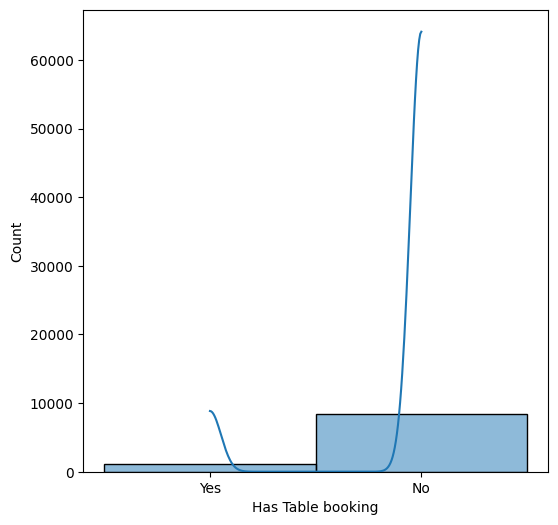

/n


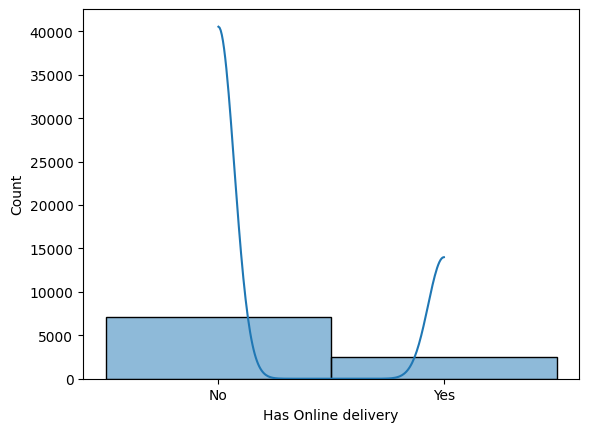

In [22]:
#visualizing categorical columns
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize=[6,6])
x=0
for i in categorical_columns:
    sns.histplot(data=df,kde=True,x=i)
    print('/n')
    plt.show()

In [23]:
#creating preprocessing pipepline
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import  ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings



In [24]:
numerical_cols=X.select_dtypes(exclude='O').columns
categorical_cols=X.select_dtypes(include='O').columns

In [25]:
nump_pipeline=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='median')),
        ('scalar',StandardScaler())
    ]
)
cat_pipeline=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('encoder',OneHotEncoder(handle_unknown='ignore'))
    ]
)
preprocessor=ColumnTransformer([
    ('num_pipeline',nump_pipeline,numerical_cols),
    ('cat_pipeline',cat_pipeline,categorical_cols)
])

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [27]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [28]:
X_train

,num_pipeline__Longitude,num_pipeline__Latitude,num_pipeline__Price range,num_pipeline__Votes,cat_pipeline__Has Table booking_No,cat_pipeline__Has Table booking_Yes,cat_pipeline__Has Online delivery_No,cat_pipeline__Has Online delivery_Yes
0,0.319100,0.254084,0.208021,-0.332003,1.0,0.0,0.0,1.0
1,0.319259,0.249309,0.208021,0.006777,1.0,0.0,1.0,0.0
2,0.320729,0.246480,1.308629,3.529625,0.0,1.0,0.0,1.0
3,0.316791,0.241389,1.308629,1.453457,0.0,1.0,0.0,1.0
4,0.321854,0.238461,-0.892587,-0.359471,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
7635,-3.578140,0.782249,0.208021,-0.274777,1.0,0.0,1.0,0.0
7636,0.318401,0.245600,0.208021,0.686625,1.0,0.0,0.0,1.0
7637,0.320471,0.248883,-0.892587,-0.361760,1.0,0.0,0.0,1.0
7638,0.321793,0.250171,0.208021,-0.162613,1.0,0.0,0.0,1.0


In [29]:
X_test

,num_pipeline__Longitude,num_pipeline__Latitude,num_pipeline__Price range,num_pipeline__Votes,cat_pipeline__Has Table booking_No,cat_pipeline__Has Table booking_Yes,cat_pipeline__Has Online delivery_No,cat_pipeline__Has Online delivery_Yes
0,0.321975,0.253956,-0.892587,-0.357182,1.0,0.0,1.0,0.0
1,-1.536305,-2.314287,0.208021,-0.361760,1.0,0.0,1.0,0.0
2,0.320108,0.250809,-0.892587,0.823968,1.0,0.0,0.0,1.0
3,-3.787221,1.415643,-0.892587,1.146724,1.0,0.0,1.0,0.0
4,0.319852,0.254938,-0.892587,-0.345737,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
1906,0.319405,0.245067,0.208021,-0.185504,1.0,0.0,1.0,0.0
1907,0.318267,0.259239,-0.892587,0.098339,1.0,0.0,1.0,0.0
1908,-1.536305,-2.314287,0.208021,-0.075629,1.0,0.0,1.0,0.0
1909,-3.540640,0.731420,-0.892587,1.041428,1.0,0.0,1.0,0.0


In [30]:
import numpy as np 
def evaluate_model(true,predicted):
    r2=r2_score(true,predicted)
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))

    return r2,mae,mse,rmse

In [32]:
from sklearn.metrics import r2_score

# Dictionaries to hold models and accuracies
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
accuracy_list = []

for model_name,model in models.items():
    model.fit(X_train,y_train)
    train_accuracy=model.score(X_train,y_train)
    test_accuracy=model.score(X_test,y_test)
    print(f"Model: {model_name}")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    accuracy_list.append(test_accuracy)
    model_list.append(model_name)
    print('=='*50)

Model: Linear Regression
Training Accuracy: 0.2784
Test Accuracy: 0.2632
Model: Lasso
Training Accuracy: 0.0000
Test Accuracy: -0.0015
Model: Ridge
Training Accuracy: 0.2784
Test Accuracy: 0.2632
Model: K-Neighbors Regressor
Training Accuracy: 0.9527
Test Accuracy: 0.9281
Model: Decision Tree
Training Accuracy: 0.9999
Test Accuracy: 0.9189
Model: Random Forest Regressor
Training Accuracy: 0.9937
Test Accuracy: 0.9550
Model: XGBRegressor
Training Accuracy: 0.9829
Test Accuracy: 0.9538
Model: CatBoosting Regressor
Training Accuracy: 0.9714
Test Accuracy: 0.9568
Model: AdaBoost Regressor
Training Accuracy: 0.9416
Test Accuracy: 0.9392


In [33]:
# Results
pd.DataFrame(list(zip(model_list, accuracy_list)),columns=['Model Name','Accuracy Score']).sort_values(
    by=["Accuracy Score"],ascending=False)

,Model Name,Accuracy Score
7,CatBoosting Regressor,0.956761
5,Random Forest Regressor,0.955036
6,XGBRegressor,0.953753
8,AdaBoost Regressor,0.939204
3,K-Neighbors Regressor,0.928054
4,Decision Tree,0.918926
2,Ridge,0.263191
0,Linear Regression,0.263186
1,Lasso,-0.001517


In [34]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create the CatBoost Regressor model
catboost_model = CatBoostRegressor(verbose=0)

# Fit the model to the training data
catboost_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = catboost_model.predict(X_test)

# Calculate the performance metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R2 Score: {r2:.4f}")

Root Mean Squared Error: 0.3172
Mean Absolute Error: 0.2062
R2 Score: 0.9568


g:\cognify-technologies\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
